In [416]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# File to Load
data_to_load = Path("Resources/Real_Estate_data.csv")

# Read Real Estate Data File and store into Pandas DataFrames
real_estate_data_df = pd.read_csv(data_to_load, low_memory=False)

# view the data
real_estate_data_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
0,2001,3/14/2002,East Haven,111 PROSPECT RD,84630,10000,8.463000,NaN,NaN,POINT (-72.87317 41.27318),130157,-72.8731,41.2731
1,2001,10/3/2001,Clinton,1 W WOODS DR,137100,260000,0.527308,NaN,NaN,POINT (-72.50679 41.28246),130158,-72.5067,41.2824
2,2001,10/31/2001,Middletown,148-150 WASHINGTON ST,131110,230000,0.570043,NaN,NaN,POINT (-72.65351 41.56143),130159,-72.6535,41.5614
3,2001,9/27/2002,Danbury,2 QUAIL RUN DR,200100,435000,0.460000,NaN,NaN,POINT (-73.50208 41.3951),130160,-73.502,41.3951
4,2001,7/18/2002,Hartford,104-106 EDWARDS ST,61810,19500,3.169744,NaN,NaN,POINT (-72.68094 41.7755),130161,-72.6809,41.7755


In [417]:
#Filter Data to have just five most populated towns in CT "Bridgeport", "Stamford", "New Haven", "Hartford", "Waterbury"

narrow_df = real_estate_data_df[real_estate_data_df['Town'].isin(["Bridgeport", "Stamford", "New Haven", "Hartford", "Waterbury"])]
narrow_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
4,2001,7/18/2002,Hartford,104-106 EDWARDS ST,61810,19500,3.169744,NaN,NaN,POINT (-72.68094 41.7755),130161,-72.6809,41.7755
8,2001,6/21/2002,Hartford,17-19 EARLE ST,3360,10000,0.336000,NaN,NaN,POINT (-72.67124 41.79073),130165,-72.6712,41.7907
11,2001,5/30/2002,Bridgeport,652-654 MAPLE ST,38360,100000,0.383600,NaN,NaN,POINT (-73.17707 41.18811),130168,-73.177,41.1881
14,2001,6/4/2002,Bridgeport,295 HANOVER ST,37660,60000,0.627667,NaN,NaN,POINT (-73.20239 41.17155),130171,-73.2023,41.1715
20,2001,4/8/2002,Bridgeport,246C PENNSYLVANIA AVE,19950,48410,0.412105,NaN,NaN,POINT (-73.17443 41.20893),130177,-73.1744,41.2089


In [437]:
narrow_df['List Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [419]:
# Filter out rows where the Year is between 2001 and 2005 (inclusive)
df_filtered = narrow_df[~narrow_df['List Year'].between(2001, 2005)]

In [420]:
df_filtered.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
63470,2006,4/4/2007,Bridgeport,3380 E MAIN ST,135801,294000,0.461908,Single Family,Single Family,POINT (-73.17675 41.22032),190624,-73.1767,41.2203
63477,2006,8/9/2007,Bridgeport,307 GOLDEN HL ST,277521,325000,0.853911,NaN,NaN,POINT (-73.19296 41.17964),190639,-73.1929,41.1796
63483,2006,12/26/2006,Bridgeport,582 WILLIAM ST 584,42560,378000,0.112593,Two Family,Two Family,POINT (-73.18544 41.19226),190655,-73.1854,41.1922
63525,2006,3/16/2007,Bridgeport,2370 NORTH AVE UT 12F,59099,175000,0.337709,Condo,Condo,POINT (-73.21628 41.17892),190739,-73.2162,41.1789
63526,2006,5/25/2007,Bridgeport,3250 FAIRFIELD AVE UT130,4775276,319900,14.927402,Condo,Condo,POINT (-73.23261 41.15553),190742,-73.2326,41.1555


In [421]:
df_filtered["Residential Type"].unique()

array(['Single Family', nan, 'Two Family', 'Condo', 'Three Family',
       'Four Family'], dtype=object)

In [422]:
df_filtered_1 = df_filtered.dropna(subset=['Residential Type'])
df_filtered_1["Residential Type"].unique()

array(['Single Family', 'Two Family', 'Condo', 'Three Family',
       'Four Family'], dtype=object)

In [423]:
df_filtered_2 = df_filtered_1.dropna(subset=['Residential Type'])
df_filtered_2["Residential Type"].unique()

array(['Single Family', 'Two Family', 'Condo', 'Three Family',
       'Four Family'], dtype=object)

In [424]:
property_counts = df_filtered_2["Residential Type"].value_counts()
property_counts

Residential Type
Single Family    13121
Condo             7306
Two Family        3434
Three Family      2942
Four Family        375
Name: count, dtype: int64

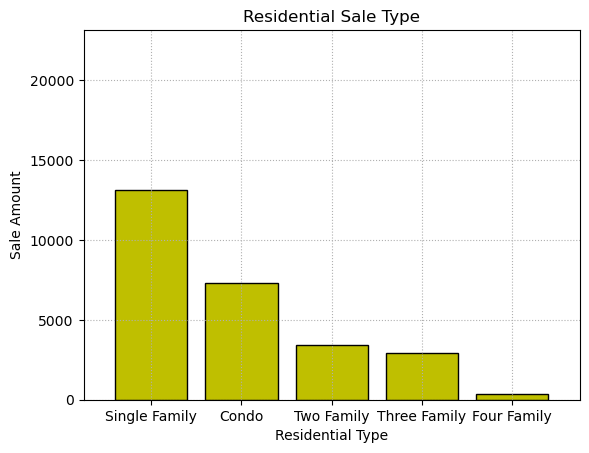

In [425]:
x_axis = property_counts.index
edgecolor = 'black'
plt.bar(x_axis, property_counts, color="y", align="center", ec=edgecolor)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(property_counts)+10000)
plt.title("Residential Sale Type")
plt.grid(True,linestyle=':', alpha=1)
plt.xlabel("Residential Type")
plt.ylabel("Sale Amount")

plt.show()

In [426]:
clean_df = pd.DataFrame(df_filtered_2)
clean_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
63470,2006,4/4/2007,Bridgeport,3380 E MAIN ST,135801,294000,0.461908,Single Family,Single Family,POINT (-73.17675 41.22032),190624,-73.1767,41.2203
63483,2006,12/26/2006,Bridgeport,582 WILLIAM ST 584,42560,378000,0.112593,Two Family,Two Family,POINT (-73.18544 41.19226),190655,-73.1854,41.1922
63525,2006,3/16/2007,Bridgeport,2370 NORTH AVE UT 12F,59099,175000,0.337709,Condo,Condo,POINT (-73.21628 41.17892),190739,-73.2162,41.1789
63526,2006,5/25/2007,Bridgeport,3250 FAIRFIELD AVE UT130,4775276,319900,14.927402,Condo,Condo,POINT (-73.23261 41.15553),190742,-73.2326,41.1555
63529,2006,5/1/2007,Bridgeport,80 CARTRIGHT ST PC,61296,180000,0.340533,Condo,Condo,POINT (-73.2189 41.17882),190750,-73.2189,41.1788


In [427]:
rs_data_df = pd.DataFrame(clean_df)
rs_data_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
63470,2006,4/4/2007,Bridgeport,3380 E MAIN ST,135801,294000,0.461908,Single Family,Single Family,POINT (-73.17675 41.22032),190624,-73.1767,41.2203
63483,2006,12/26/2006,Bridgeport,582 WILLIAM ST 584,42560,378000,0.112593,Two Family,Two Family,POINT (-73.18544 41.19226),190655,-73.1854,41.1922
63525,2006,3/16/2007,Bridgeport,2370 NORTH AVE UT 12F,59099,175000,0.337709,Condo,Condo,POINT (-73.21628 41.17892),190739,-73.2162,41.1789
63526,2006,5/25/2007,Bridgeport,3250 FAIRFIELD AVE UT130,4775276,319900,14.927402,Condo,Condo,POINT (-73.23261 41.15553),190742,-73.2326,41.1555
63529,2006,5/1/2007,Bridgeport,80 CARTRIGHT ST PC,61296,180000,0.340533,Condo,Condo,POINT (-73.2189 41.17882),190750,-73.2189,41.1788


In [428]:
rs_data_df['Sale Amount'] = pd.to_numeric(rs_data_df['Sale Amount'], errors = 'coerce')
rs_data_res_type = rs_data_df.groupby('List Year')['Sale Amount'].sum()
rs_data_res_type

List Year
2006     157283577
2007     114390690
2008     149469808
2009     229837272
2010     233643942
2011     183948938
2012      69108209
2013     210332927
2014     223725392
2015     207644100
2016     217864571
2017     105933363
2018     244608885
2019      32211483
2020    1846265627
2021    2740773890
2022    2269643546
Name: Sale Amount, dtype: int64

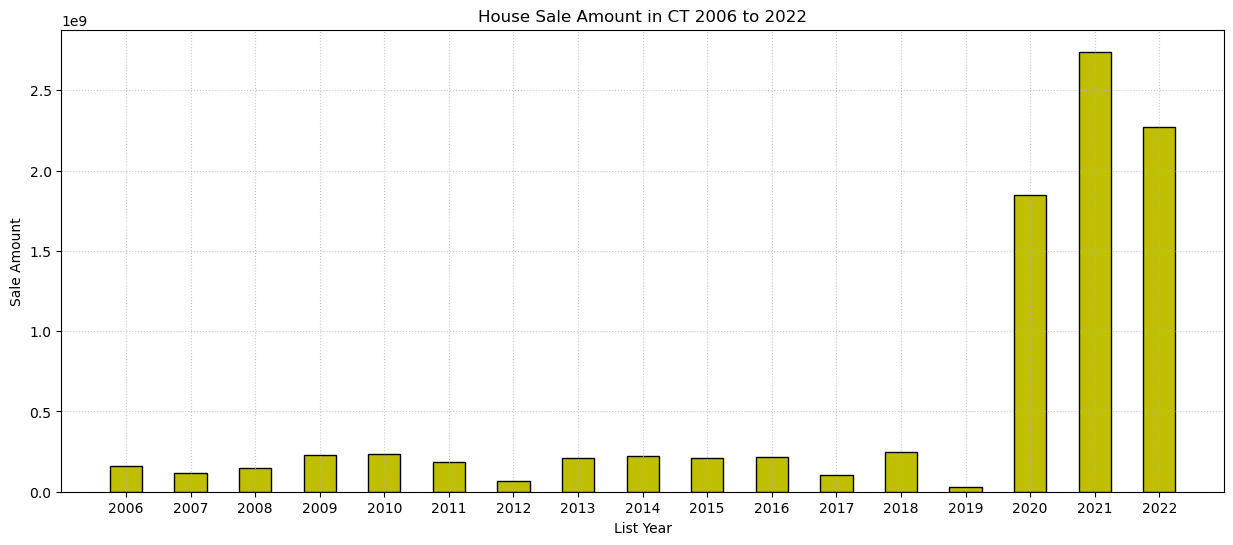

In [429]:
#Analysis by year w/ graph

fig = plt.figure(figsize=(15,6))
x = rs_data_res_type.index
y = rs_data_res_type

bar_width = 0.5
edgecolor = 'black'

bars = plt.bar(x, y, bar_width, color="y", ec=edgecolor, lw=1)
plt.ylabel('Sale Amount')
plt.xlabel('List Year')
plt.title('House Sale Amount in CT 2006 to 2022') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2005, x.max()+1)
plt.xticks(x, rs_data_res_type.index)

for bar in bars:
        height = bar.get_height()

plt.show()

In [430]:
#Find 6 towns in CT Bridgeport, Stamford, New Haven, Hartford, and Waterbury

In [431]:
rs_data_df['Sale Amount'] = pd.to_numeric(rs_data_df['Sale Amount'], errors = 'coerce')
rs_data_res_sale = rs_data_df.groupby('Town')['Sale Amount'].sum()
rs_data_res_sale

Town
Bridgeport    1451749557
Hartford       494724364
New Haven     1056809039
Stamford      5038260486
Waterbury     1195142774
Name: Sale Amount, dtype: int64

In [441]:
mean = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).mean()
median = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).median()
var = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).var()
std = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).std()
sem = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).sem()

sum_stat = pd.DataFrame({"Mean Assessed Value ":mean, 
                            "Median Assessed Value":median, 
                           "Assessed Value Variance":var, 
                           "Assessed Value Std. Dev.":std, 
                           "Assessed Value Std. Err.":sem})

sum_stat

,Mean Assessed Value,Median Assessed Value,Assessed Value Variance,Assessed Value Std. Dev.,Assessed Value Std. Err.
Town,,,,,
Bridgeport,145056.415463,134690.0,4.657032e+10,215801.578131,2719.060132
Hartford,67135.191113,51671.0,2.945981e+10,171638.590456,3403.625426
New Haven,160270.640109,137795.0,1.176439e+10,108463.788665,1703.502982
Stamford,360018.274893,313380.0,6.671820e+10,258298.673607,3085.056819
Waterbury,82578.121012,77460.0,2.350605e+09,48483.038236,568.542444


In [440]:
mean = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).mean()
median = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).median()
var = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).var()
std = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).std()
sem = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).sem()

sum_stat = pd.DataFrame({"Mean Sale ":mean, 
                            "Median Mean Sale ":median, 
                           "Sale Amount Variance":var, 
                           "Sale Amount Std. Dev.":std, 
                           "Sale Amount":sem})

sum_stat

,Mean Sale,Median Mean Sale,Sale Amount Variance,Sale Amount Std. Dev.,Sale Amount
Town,,,,,
Bridgeport,230473.020638,210000.0,3.767772e+10,1.941075e+05,2445.718818
Hartford,194543.595753,157000.0,8.948680e+10,2.991434e+05,5932.070521
New Haven,260683.038727,225090.0,3.937127e+10,1.984220e+05,3116.361603
Stamford,718724.748359,505000.0,8.951672e+12,2.991934e+06,35734.940187
Waterbury,164348.566282,155000.0,1.204002e+10,1.097270e+05,1286.727530


In [ ]:
#Visualize data/trend for house price

In [ ]:
#Analysis and comments/insights